# RNA-seq - Unsupervised analysis
- goal: unsupervised analysis
- input: filtered and normalized (TMM & CQN) data
- output: PCA & UMAP plots

In [1]:
cd ../

/home/sreichl/projects/bmdm-stim


In [3]:
# libraries
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np

In [5]:
# import util functions
import sys
sys.path.insert(1, os.path.join('src'))

import utils_dimred_UMAP_PCA

In [4]:
# configs
dir_data = os.path.join('results','RNA','counts')
dir_results=os.path.join('results','RNA','unsupervised_analysis')
metadata_path=os.path.join('metadata','RNA_sample_metadata.csv')

In [5]:
if not os.path.exists(dir_results):
        os.mkdir(dir_results)

# load data

In [6]:
# Load sample annotation
annot = pd.read_csv(metadata_path, index_col=0, header=0,)
print(annot.shape)
annot.head()

(66, 10)


,library,timepoint after thawing,cell_line,Treatment,Treatment_time,mouse_pool,sex,organism,bio-replicate,experiment_id
sample_name,,,,,,,,,,
RNA_PT76_R1_C_albicans_2h,Quant-seq,d010,BMDM,C_albicans,2h,PT62_c,female,mouse,R1,PT76
RNA_PT82_R1_C_albicans_24h,Quant-seq,d010,BMDM,C_albicans,24h,PT62_c,female,mouse,R1,PT82
RNA_PT76_R1_C_albicans_4h,Quant-seq,d010,BMDM,C_albicans,4h,PT62_c,female,mouse,R1,PT76
RNA_PT76_R1_C_albicans_6h,Quant-seq,d010,BMDM,C_albicans,6h,PT62_c,female,mouse,R1,PT76
RNA_PT82_R1_C_albicans_8h,Quant-seq,d010,BMDM,C_albicans,8h,PT62_c,female,mouse,R1,PT82


In [7]:
# Load filtered & TMM normalized data
data_TMM = pd.read_csv(os.path.join(dir_data,'all_TMMnorm.tsv'), index_col=0, header=0, sep='\t')
print(data_TMM.shape)
data_TMM.head()

(12729, 64)


,RNA_PT82_R1_LO28_24h,RNA_PT82_R2_LO28_24h,RNA_PT76_R2_LCMV_Cl13_4h,RNA_PT76_R1_LO28_6h,RNA_PT82_R2_untreated_24h,RNA_PT82_R2_IFN_beta_24h,RNA_PT76_R1_LCMV_Cl13_2h,RNA_PT76_R1_LPS_6h,RNA_PT76_R1_C_albicans_4h,RNA_PT82_R2_IFN_gamma_24h,...,RNA_PT76_R1_LCMV_Cl13_4h,RNA_PT76_R2_C_albicans_6h,RNA_PT82_R1_LPS_8h,RNA_PT76_R2_LPS_2h,RNA_PT82_R2_IFN_beta_8h,RNA_PT82_R2_LO28_8h,RNA_PT82_R1_IFN_beta_8h,RNA_PT76_R2_LPS_4h,RNA_PT76_R1_IFN_beta_6h,RNA_PT82_R2_LPS_8h
ENSMUSG00000098104,-0.807760,0.164313,1.270408,1.037207,0.756444,0.973326,1.957244,0.094197,-0.807760,0.238784,...,-0.038146,0.007966,1.728579,1.045138,0.237038,-0.807760,0.843758,0.573065,1.209996,0.441679
ENSMUSG00000033845,5.062522,4.969734,6.140173,5.410492,5.259483,5.292851,5.882193,5.897711,5.853490,5.511507,...,5.599471,5.601637,5.784541,5.722510,5.429028,5.163793,5.122171,5.680309,5.463485,5.648091
ENSMUSG00000025903,5.167674,5.067515,3.626889,5.093400,4.889506,4.897494,4.658793,4.578505,4.943077,4.851858,...,5.233195,4.599254,4.260100,4.926815,5.136991,4.968848,5.003383,4.931089,5.590623,5.060023
ENSMUSG00000033813,3.790355,4.494789,2.692106,4.792992,3.943498,4.469152,2.720925,4.969743,3.545867,4.235202,...,4.094186,3.620180,4.010197,3.644968,5.555506,5.176759,5.017075,4.496026,5.425003,4.990302
ENSMUSG00000033793,7.914274,7.651692,4.099340,6.240462,6.121245,6.256263,4.790191,5.121400,6.468911,5.717474,...,6.087740,6.009186,6.026317,5.769313,6.624256,6.843153,5.749303,6.271360,6.405530,6.777292


In [8]:
# Load filtered & CQN normalized data
data_CQN = pd.read_csv(os.path.join(dir_data,'all_CQNnorm.tsv'), index_col=0, header=0, sep='\t')
print(data_CQN.shape)
data_CQN.head()

(12729, 64)


,RNA_PT82_R1_LO28_24h,RNA_PT82_R2_LO28_24h,RNA_PT76_R2_LCMV_Cl13_4h,RNA_PT76_R1_LO28_6h,RNA_PT82_R2_untreated_24h,RNA_PT82_R2_IFN_beta_24h,RNA_PT76_R1_LCMV_Cl13_2h,RNA_PT76_R1_LPS_6h,RNA_PT76_R1_C_albicans_4h,RNA_PT82_R2_IFN_gamma_24h,...,RNA_PT76_R1_LCMV_Cl13_4h,RNA_PT76_R2_C_albicans_6h,RNA_PT82_R1_LPS_8h,RNA_PT76_R2_LPS_2h,RNA_PT82_R2_IFN_beta_8h,RNA_PT82_R2_LO28_8h,RNA_PT82_R1_IFN_beta_8h,RNA_PT76_R2_LPS_4h,RNA_PT76_R1_IFN_beta_6h,RNA_PT82_R2_LPS_8h
ENSMUSG00000098104,0.258545,1.747844,1.791275,0.704365,1.062523,1.337533,1.702300,-0.303783,-1.954305,0.406271,...,-0.075497,-2.774950,1.675417,-0.175139,0.015277,-2.765859,0.653405,-1.249847,0.980809,0.258545
ENSMUSG00000033845,5.038626,4.967299,6.178630,5.377502,5.254422,5.278089,5.975631,5.792201,5.930708,5.550453,...,5.658135,5.710921,5.693381,5.682732,5.317047,5.050921,5.164841,5.579888,5.420847,5.487298
ENSMUSG00000025903,5.068170,5.044477,4.096769,4.922032,4.713013,4.850333,4.735860,4.708213,4.846524,4.727363,...,5.132195,4.638445,4.406643,4.884688,5.031117,4.810776,4.940492,4.747172,5.347441,4.938900
ENSMUSG00000033813,4.150806,4.638445,3.753180,4.711896,3.856961,4.555976,3.238577,5.083985,3.466594,4.152709,...,4.022969,3.657965,4.286988,3.798024,5.418352,5.037066,5.146276,4.451770,5.338015,4.885193
ENSMUSG00000033793,7.466003,7.268997,4.239945,5.778935,5.972506,6.031293,4.697392,5.022747,6.399190,5.512151,...,5.979485,5.976855,5.755168,5.537024,6.245431,6.326195,5.456460,5.835344,5.953737,6.439388


# Unsupervised analysis on filtered and normalized data (PCA & UMAP)

In [9]:
# rename annotation
annot.loc[annot['Treatment']=='untreated','Treatment_time'] = '0h'

discrete variable  Treatment


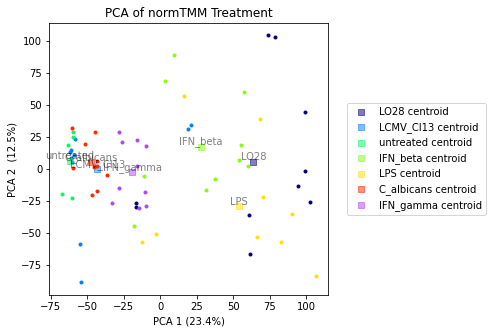

discrete variable  Treatment_time


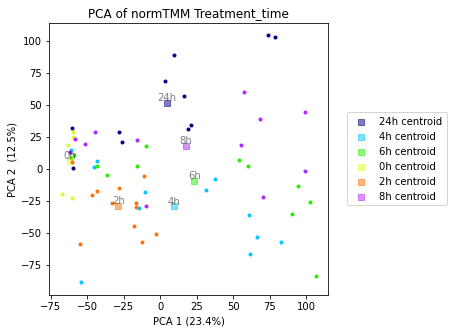

discrete variable  bio-replicate


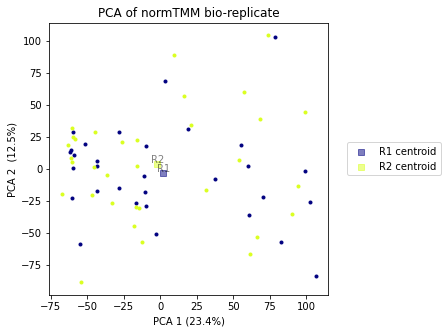

discrete variable  experiment_id


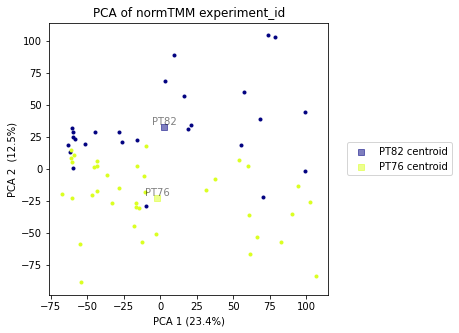

discrete variable  Treatment


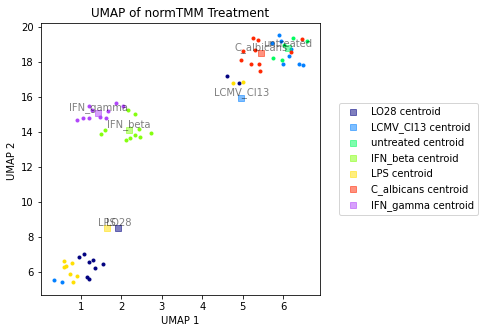

discrete variable  Treatment_time


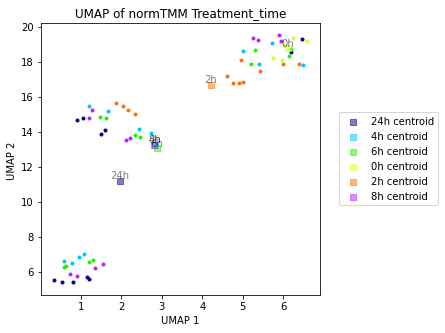

discrete variable  bio-replicate


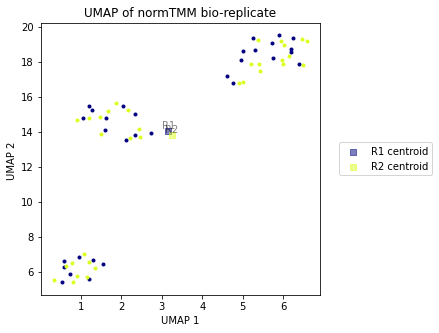

discrete variable  experiment_id


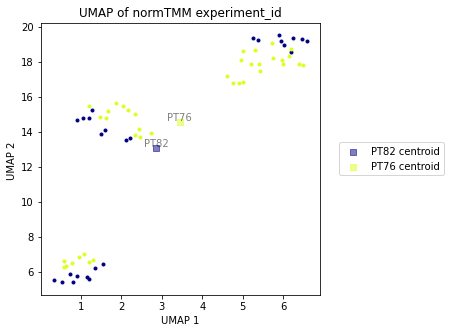

In [10]:
# plot PCA & UMAP again with final cluster labels and gene_biotype
dimred_UMAP_PCA.dimred_plot(data=data_TMM.T, 
            annot=annot.loc[data_TMM.columns,], 
            variables=['Treatment','Treatment_time','bio-replicate','experiment_id'], 
           label='normTMM',
            results_dir=os.path.join(dir_results),
           )

discrete variable  Treatment


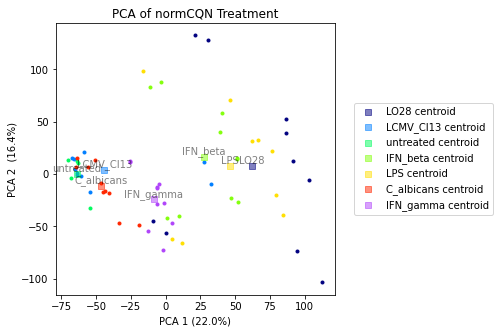

discrete variable  Treatment_time


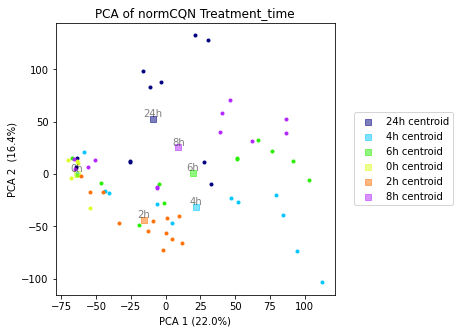

discrete variable  bio-replicate


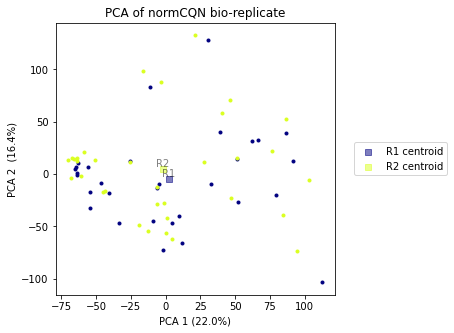

discrete variable  experiment_id


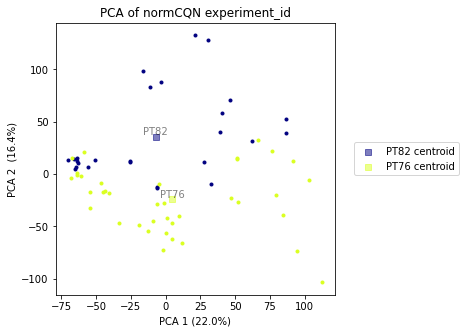

discrete variable  Treatment


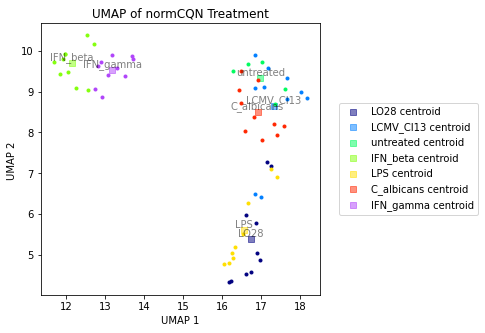

discrete variable  Treatment_time


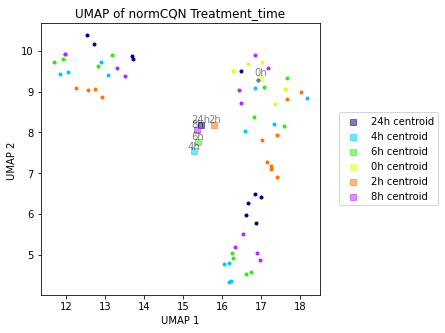

discrete variable  bio-replicate


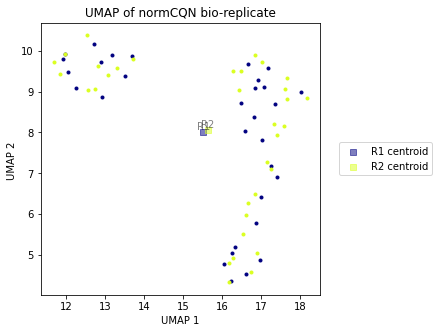

discrete variable  experiment_id


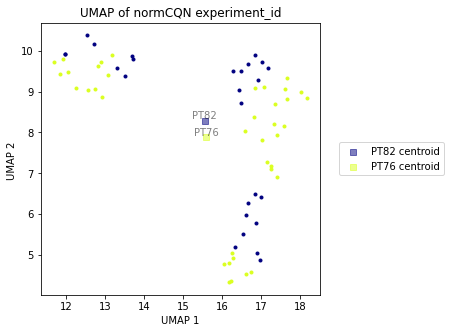

In [11]:
# plot PCA & UMAP again with final cluster labels and gene_biotype
dimred_UMAP_PCA.dimred_plot(data=data_CQN.T, 
            annot=annot.loc[data_CQN.columns,], 
            variables=['Treatment','Treatment_time','bio-replicate','experiment_id'], 
           label='normCQN',
            results_dir=os.path.join(dir_results),
           )